In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np
import lbg_forecast.nz_sim as nz
import lbg_forecast.emulator as em
import lbg_forecast.hyperparams as hyp
import lbg_forecast.popmodel as pop
import lbg_forecast.tools as tools
import matplotlib.pyplot as plt

2023-12-13 16:20:33.464625: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-13 16:20:33.464646: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-13 16:20:33.464659: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-13 16:20:33.464686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-13 16:20:33.464707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# initalise fsps emulator
model = em.fsps_emulator()

In [4]:
# nz histogram parameters
dz = 0.1
minz = 0.0
maxz = 7.0

bins = np.arange(minz, maxz, dz)

In [5]:
bounds = hyp.define_hyperparameter_bounds(   

    zred = np.array([0, 0, 7]),
    logtage = np.array([1, -3, 1]),
    logzsol = np.array([1, -2.5, 0.5]),
    dust1 = np.array([1, 0, 2]),
    dust2 = np.array([1, 0, 2]),
    igm_factor = np.array([0, 1, 1]), 
    gas_logu = np.array([1, -4, -1]),
    logfagn = np.array([1, 0, 10]),
    imf1 = np.array([0, 1.3, 1.3]), 
    imf2 = np.array([0, 2.3, 2.3]), 
    imf3 = np.array([0, 2.3, 2.3]), 
    logtau = np.array([1, -4, 1]),
    loga = np.array([1, -3, 3]),
    logb = np.array([1, -3, 3]),
    logmass = np.array([0, 7, 13])
    
)

In [6]:
hyperparams = []
nsamples = 4
h = 0
while(h < nsamples):
    hyperparams.append(hyp.sample_hyper_parameters(bounds))
    h+=1

hyperparams = np.asanyarray(hyperparams)

In [12]:
spsparams = pop.galaxy_population_model_vec(hyperparams[0], 100000)

In [13]:
spsparams.shape

(100000, 15)

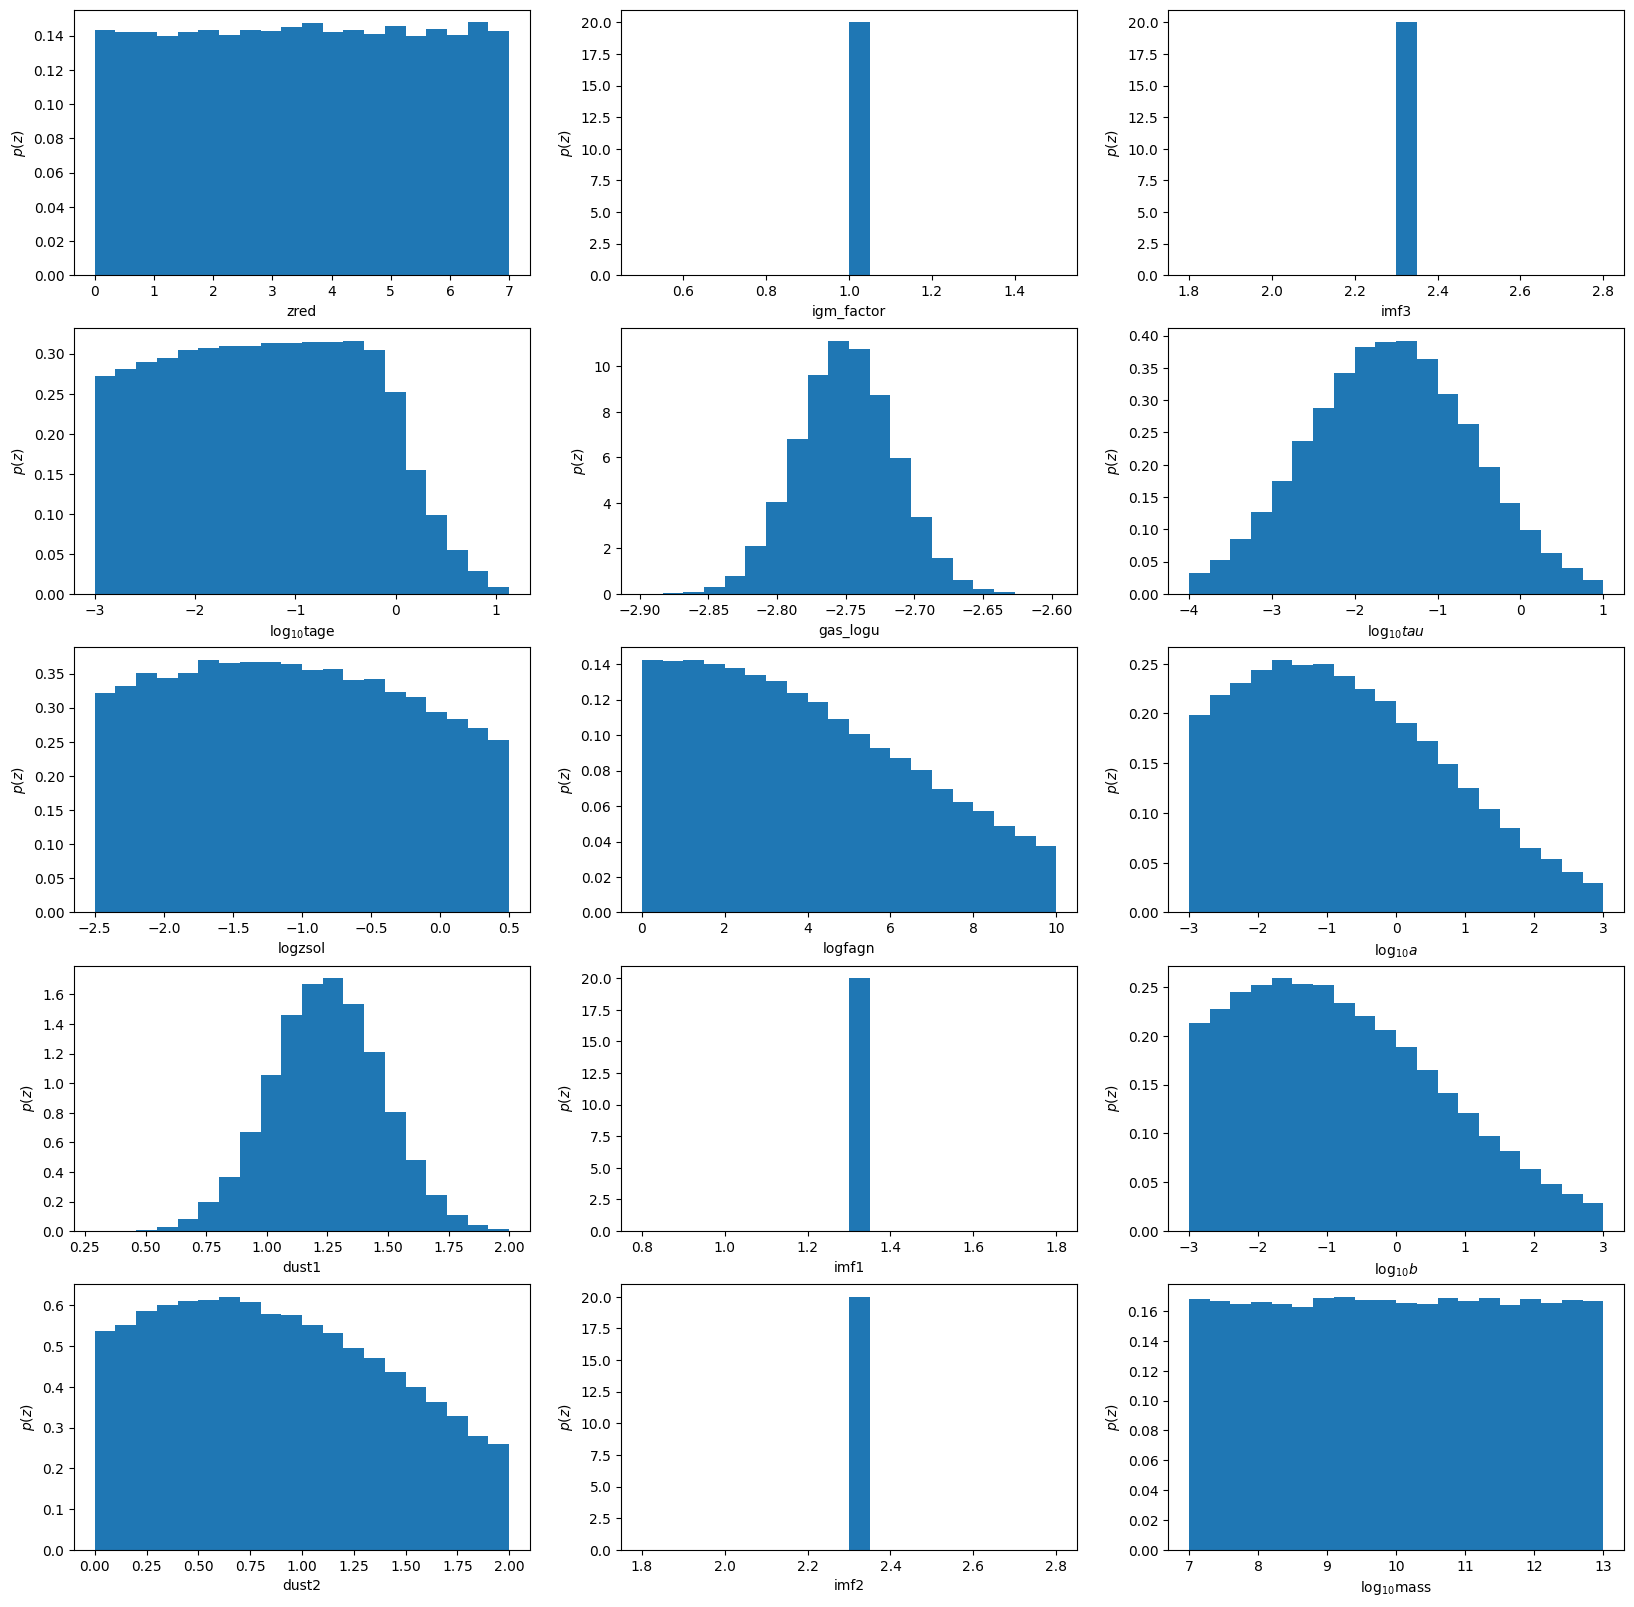

In [14]:
tools.plot_galaxy_population(spsparams)